In [1]:
import pandas as pd
import folium
import xml.etree.ElementTree as ET
from PIL import Image

In [2]:
df = pd.read_csv('data/df_translated.csv')

In [51]:
def get_species_data(species_name):
    return df[df['simplified_species'] == species_name]

def get_atribute(df, atribute):
    if atribute == 'lats_longs_animals':
        string_coords = df[atribute].unique()[0].strip('[]')
        coordinates_str = string_coords.split()
        coordinates = [float(coord) for coord in coordinates_str][::-1]
        return coordinates
    elif len(df[atribute].unique()) >1:
        return df[atribute].unique()
    else:
        return df[atribute].unique()

In [52]:

scientific_name = 'Achirus mucuri'

df_test = get_species_data(scientific_name)
df_test

,group,family,simplified_species,comum_name,threat_category,acronym_threat_category,presence_in_protected_areas,national_action_plan_for_conservation_,fishing_planning,level_of_protection_in_the_national_strategy,exclusive_species_of_brazil,occurrence_states_y,main_threats_y,biome,category,lats_longs_animals
0,Marine Fish,Achiridae,Achirus mucuri,Halibut,Vulnerable (VU),VU,True,False,False,1.0,True,BA,Agriculture,Atlantic Forest,Invertebrates and Crustaceans,[-38.98512086 -13.71295122]
1,Marine Fish,Achiridae,Achirus mucuri,Halibut,Vulnerable (VU),VU,True,False,False,1.0,True,BA,Pollution,Atlantic Forest,Invertebrates and Crustaceans,[-40.72829339 -9.35783504]
2,Marine Fish,Achiridae,Achirus mucuri,Halibut,Vulnerable (VU),VU,True,False,False,1.0,True,BA,Wildfires,Atlantic Forest,Invertebrates and Crustaceans,[-39.55144047 -18.25432357]


In [40]:
df_count_biomes = df[['simplified_species', 'biome']]
df_count_biomes = df_count_biomes.drop_duplicates()

In [37]:
commum_name = get_atribute(df_test, 'commum_name')
threat_category = get_atribute(df_test, 'threat_category')
group = get_atribute(df_test, 'group')
acronym_threat_category = get_atribute(df_test, 'acronym_threat_category')
presence_in_protected_areas = get_atribute(df_test, 'presence_in_protected_areas')
national_action_plan_for_conservation_ = get_atribute(df_test, 'national_action_plan_for_conservation_')
fishing_planning = get_atribute(df_test, 'fishing_planning')
exclusive_species_of_brazil = get_atribute(df_test, 'exclusive_species_of_brazil')
occurrence_states_y = get_atribute(df_test, 'occurrence_states_y')
main_threats_y = get_atribute(df_test, 'main_threats_y')
biome = get_atribute(df_test, 'biome')
category = get_atribute(df_test, 'category')
lats_longs_animals = get_atribute(df_test, 'lats_longs_animals')

In [38]:
df = df.rename(columns={'commum_name':'comum_name'})

In [63]:
def generate_species_info_html(comum_name, simplified_species, group, threat_category,
                                presence_in_protected_areas, national_action_plan_for_conservation_, 
                                fishing_planning, exclusive_species_of_brazil, occurrence_states, main_threats, biomes):
    
    protected_status = "present" if presence_in_protected_areas[0] else "absent"
    conservation_plan = "a" if national_action_plan_for_conservation_[0] else "no"
    fishing_plan = "has" if fishing_planning[0] else "has not"
    exclusive_status = "is" if exclusive_species_of_brazil[0] else "is not"

    # Create a list of colored states and threats
    colored_states = [f"<span style='color: #0066BA'>{state}</span>" for state in occurrence_states]
    colored_threats = [f"<span style='color: red'>{threat}</span>" for threat in main_threats]
    colored_biome = [f"<span style='color: green'>{biome}</span>" for biome in biomes]
    

    


    # Join the colored states and threats with commas and replace the last comma with "and"
    all_biomes = ("biomes of " if len(biomes) > 1 else "biome of ") + ", ".join(colored_biome[:-1]) + (", and " if len(biomes) > 1 else "") + colored_biome[-1]
    all_states = ", ".join(colored_states[:-1]) + (", and " if len(occurrence_states) > 1 else "") + colored_states[-1]
    all_threats = ", ".join(colored_threats[:-1]) + (", and " if len(occurrence_states) > 1 else "") + colored_threats[-1]

    html_text = f"<h1>The {simplified_species}</h1><br>"
    html_text += f"Commonly referred to as {comum_name[0]}, it belongs to the {group[0]} group. "
    html_text += f"This species is categorized as <span style='color: orange'>{threat_category[0]}</span> and is {protected_status} in protected areas. "
    html_text += f"There is {conservation_plan} Brazilian conservation action plan in place, and it {fishing_plan} a fishing management strategy. "
    html_text += f"{simplified_species} {exclusive_status} exclusive to Brazil; it can also be found in the states of {all_states}. "
    html_text += f"Its primary threats include {all_threats}."
    html_text += f"This species can be found in the {all_biomes}."
    
    return html_text

simplified_species = 'Achirus mucuri'

df_test = get_species_data(scientific_name)

comum_name = get_atribute(df_test, 'comum_name')
group = get_atribute(df_test, 'group')
threat_category = get_atribute(df_test, 'threat_category')
presence_in_protected_areas = get_atribute(df_test, 'presence_in_protected_areas')
national_action_plan_for_conservation_ = get_atribute(df_test, 'national_action_plan_for_conservation_')
fishing_planning = get_atribute(df_test, 'fishing_planning')
exclusive_species_of_brazil = get_atribute(df_test, 'exclusive_species_of_brazil')
occurrence_states = get_atribute(df_test, 'occurrence_states_y')
main_threats = get_atribute(df_test, 'main_threats_y')
biomes = get_atribute(df_test, 'biome')

html_info = generate_species_info_html(comum_name, simplified_species, group, threat_category,
                                    presence_in_protected_areas, national_action_plan_for_conservation_, 
                                    fishing_planning, exclusive_species_of_brazil, occurrence_states, main_threats, biomes)

print(html_info)

<h1>The Achirus mucuri</h1><br>Commonly referred to as Halibut, it belongs to the Marine Fish group. This species is categorized as <span style='color: orange'>Vulnerable (VU)</span> and is present in protected areas. There is no Brazilian conservation action plan in place, and it has not a fishing management strategy. Achirus mucuri is exclusive to Brazil; it can also be found in the states of <span style='color: #0066BA'>BA</span>. Its primary threats include <span style='color: red'>Agriculture</span>, <span style='color: red'>Pollution</span><span style='color: red'>Wildfires</span>.This species can be found in the biome of <span style='color: green'>Atlantic Forest</span>.



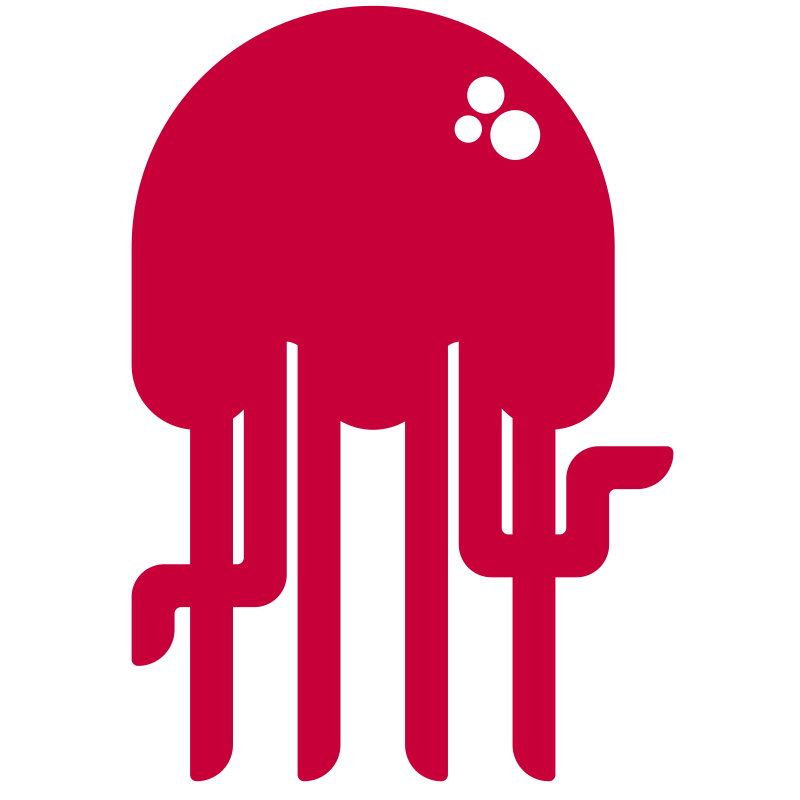
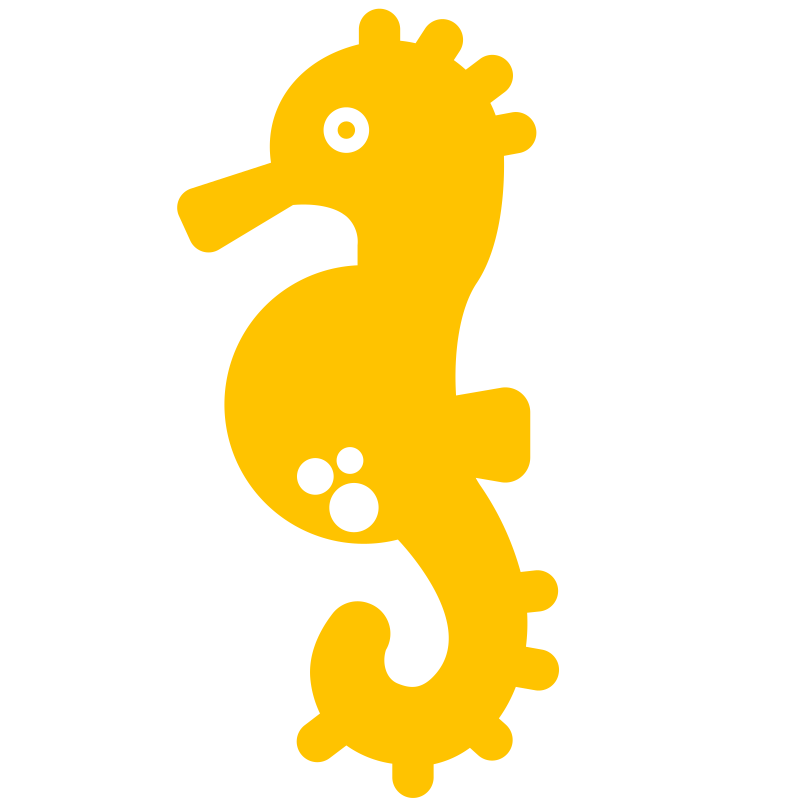
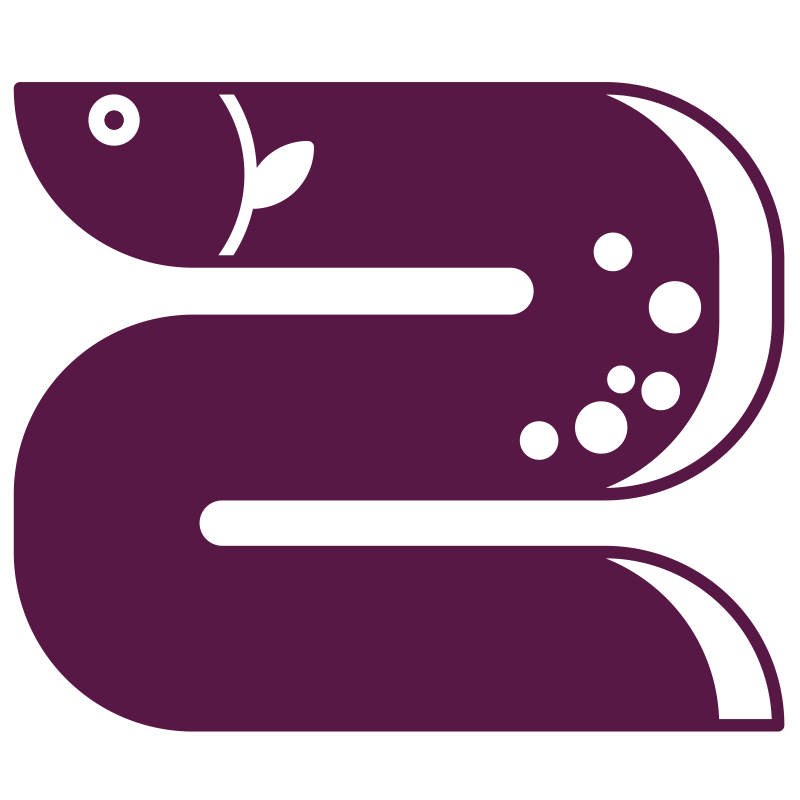
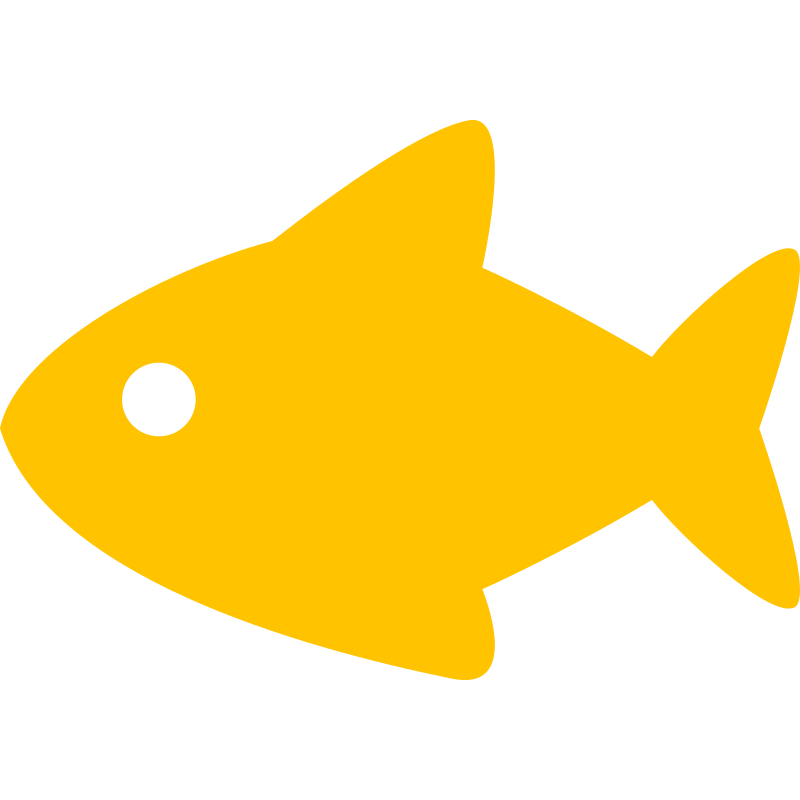

In [67]:
# Define the path to your custom icon
acronym_threat_category = get_atribute(df_test, 'acronym_threat_category')

icon_path1 = 'images/test/CR-Other.png'
icon_path2 = 'images/test/VU-Seahorses.png'
icon_path3 = 'images/test/PEX-Eletric fish.png'
icon_path4 = f'images/test/{acronym_threat_category[0]}-{group[0]}.png'

# Create a custom icon using the SVG file
custom_icon1 = folium.CustomIcon(
    icon_image=icon_path1,
    icon_size=(50, 50),  # Adjust the size of your icon as needed
)

custom_icon2 = folium.CustomIcon(
    icon_image=icon_path2,
    icon_size=(50, 50),  # Adjust the size of your icon as needed
)

custom_icon3 = folium.CustomIcon(
    icon_image=icon_path3,
    icon_size=(50, 50),  # Adjust the size of your icon as needed
)

custom_icon4 = folium.CustomIcon(
    icon_image=icon_path4,
    icon_size=(50, 50),  # Adjust the size of your icon as needed
)
# Create a Folium map
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Define a list of marker coordinates and popup texts
marker_data = [
    ([-15.7801, -47.9292], 'Other', custom_icon1),
    ([-16.5122, -42.4993], 'Seahorses', custom_icon2),
    ([-18.5122, -43.6693], 'Eletric Fish', custom_icon3),
    ([-19.5422, -46.1249], html_info,custom_icon4),

    # Add more marker coordinates and popup texts here
]

# Add markers to the map
for coords, popup_text, icon in marker_data:
    folium.Marker(location=coords, popup=popup_text, icon=icon).add_to(m)

# Display the map
m # Save the map as an HTML file or use .show() to display it in your notebook

In [13]:
# Criar camadas principais (pais)
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)


camada_pontos_interesse = folium.FeatureGroup(name='Pontos de Interesse',show=False)
camada_hotel = folium.FeatureGroup(name='Hotéis',show=False)
camada_restaurante = folium.FeatureGroup(name='Restaurantes',show=False)

# Adicione as camadas principais (pais) ao mapa
camada_pontos_interesse.add_to(m)
camada_hotel.add_to(m)
camada_restaurante.add_to(m)

# Adicione camadas secundárias (filhas)
camada_hotel_chique = folium.FeatureGroup(name='Hotéis Chiques', show=False, overlay=True)
camada_hotel_economico = folium.FeatureGroup(name='Hotéis Econômicos', show=False,overlay=True)

for i, j in df.iterrows():
        folium.Marker(
                location=[j['lats_longs_animals'][1], j['lats_longs_animals'][0]],
                popup=j['Nome Comum']
        ).add_to(camada_hotel_chique)

folium.Marker([-22.9068, -43.1729], popup='Hotel de Luxo').add_to(camada_hotel_chique)

# Adicione marcadores para hotéis econômicos
folium.Marker([-15.7801, -47.9292], popup='Hotel Econômico A').add_to(camada_restaurante)
folium.Marker([-22.9068, -43.1729], popup='Hotel Econômico B').add_to(camada_restaurante)

# Adicione as camadas secundárias (filhas) às camadas principais (pais)
camada_hotel_chique.add_to(camada_hotel)
camada_hotel_economico.add_to(camada_hotel)

# Adicione controles de camadas aninhadas (nested layer control)
folium.LayerControl(collapsed=True).add_to(m)

m

KeyError: 'Nome Comum'